In [24]:
%config InlineBackend.figure_formats = ['svg']
import oscovida as ov

ov.display_binder_link("tutorial-overview-graphs.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/tutorial-overview-graphs.ipynb)

## Overview function explained

The most important function of `oscovida` package is `overview`. It takes the following parameters:
1. `country` — a country to analyse (mandatory, `str`);
2. `region` — a region of the country (optional, `str`);
3. `subregion` — a subregion of the country (optional, `str`);
4. `savefig` — whether to save a sigure (optional, `bool`, default is `False`);
5. `dates` — a range of dates in a format "2020-05-15:2020-10-20"
6. `weeks` — how many last weeks to show (optional, `int`, default is zero, which means "all"),
7. `data` — the external data source, a pair of `pd.Series`, see below.

The function returns a triple:
(`pyplot` graph, a `pandas` series for _cases_, a `pandas` series for _deaths_).

This function provides six graphs:

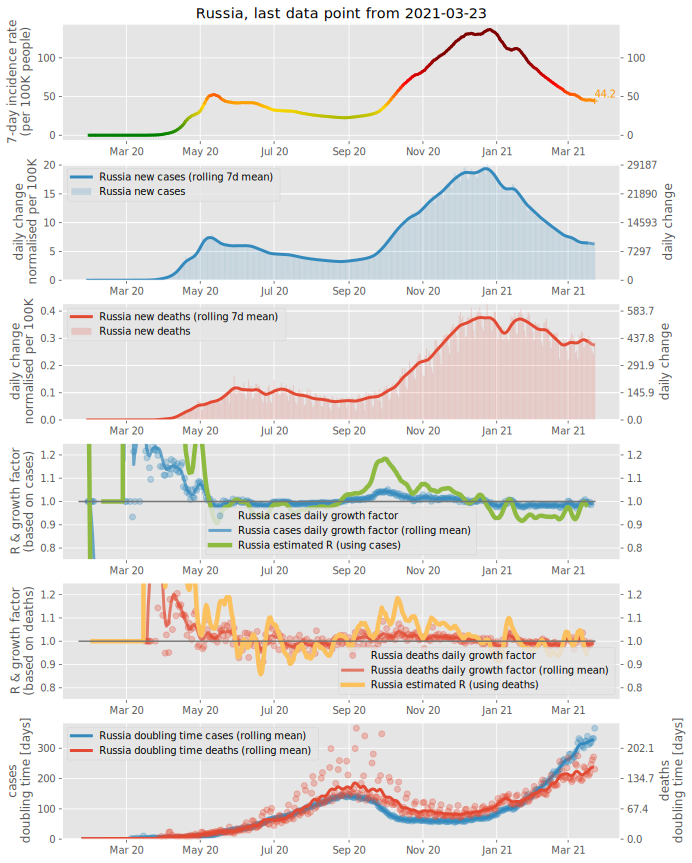

In [25]:
ov.overview('Russia');

Let's see how exactly we obtain all these graphs.

Under the hood we 
* retrieve the data with `get_country_data()` function (see the [tutorial](tutorial-accessing-cases-and-deaths.nbdata.html))
* then we optionally narrow the time range using either `weeks=N` for the last `N` weeks or
  `dates="2020-05-01:2020-10-01"` for the specific range of dates. Note that one cannot use
  both `dates` and `weeks` together.
* finally, we feed this data for *cases* and *deaths* to a set of plotting functions:
 - `plot_incidence_rate` for 7-day incidence rate per 100 thousand inhabitants (plot 1)
 - `plot_daily_change` for daily changes (plots 2 and 3, see the [tutorial](tutorial-overview-plot_daily_change.nbdata.html))
 - `plot_reproduction_number` for `R`-value and the growth factor (plots 4 and 5, see the [tutorial](tutorial-overview-plot_reproduction_number.nbdata.html))
 - `plot_doubling_time` for the doubling times (plot 6, see the [tutorial](tutorial-overview-plot_doubling_time.nbdata.html)).

That's exactly how we fetch the data using `weeks` inside the `overview` function:

In [26]:
country = "Iran"
weeks = 30
cases, deaths = ov.get_country_data(country)
cases = cases[- weeks * 7:]   # cut off unwanted data
deaths = deaths[- weeks * 7:] # cut off unwanted data

What we have in `cases` and `deaths` are Pandas time series: it is a sort of a two-row array with dates in one row and COVID cases / deaths in the other:

In [27]:
cases

2020-08-26     365606
2020-08-27     367796
2020-08-28     369911
2020-08-29     371816
2020-08-30     373570
               ...   
2021-03-19    1786265
2021-03-20    1793805
2021-03-21    1801065
2021-03-22    1808422
2021-03-23    1815712
Freq: D, Name: Iran cases, Length: 210, dtype: object

And here is the example with `dates`:

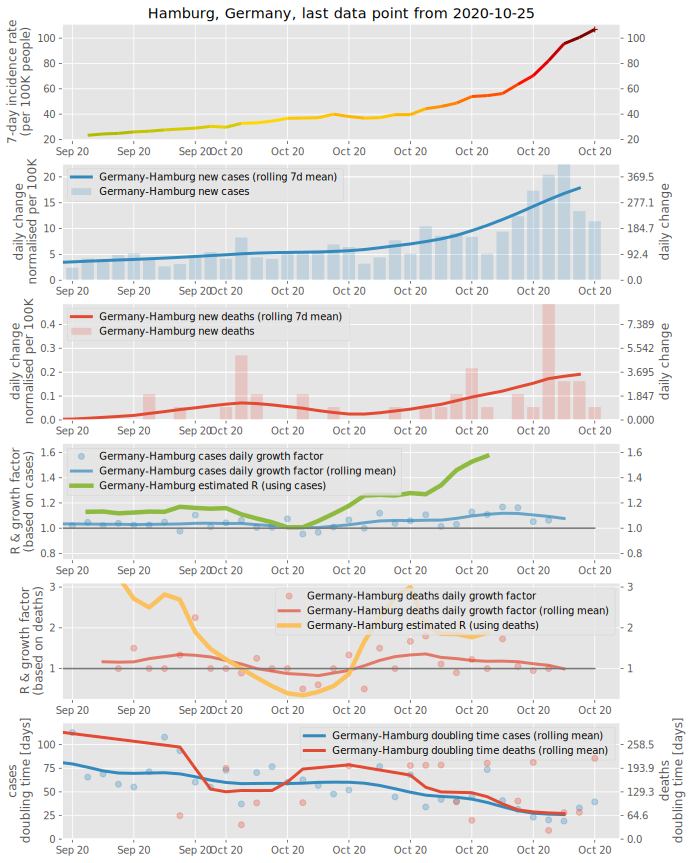

In [28]:
country = "Germany"
region="Hamburg"
dates = "2020-09-15:2020-10-25"
cases, deaths = ov.get_country_data(country, region)

date_start, date_end = dates.split(':')
cases = cases[date_start:date_end]
deaths = deaths[date_start:date_end]

ov.overview(country=country, region=region, dates=dates);

### External data source

One may pass an external data object to the `overview` for visualisation.
The data object should contain a pair of Pandas series (one for cases, and one for deaths).
Each series must have an index of type `pd.Timestamp`. See the example with an artificial data:

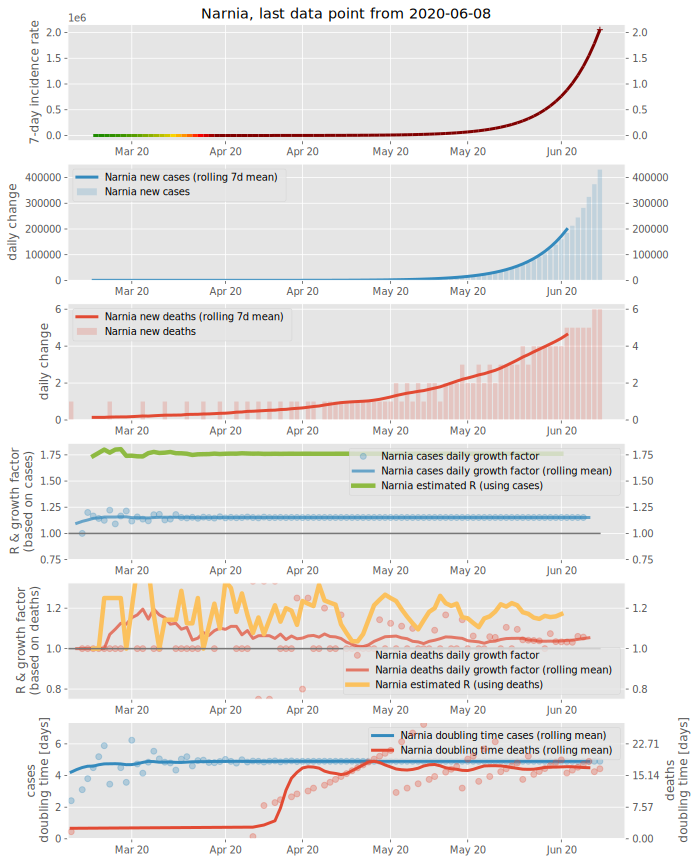

In [29]:
import numpy as np
import pandas as pd

days = 100
country = "Narnia"
dates = pd.date_range("2020-03-01", periods=days, freq='D')
data1 = np.exp(np.linspace(1,15,days)).astype(int)  # don't have to be integers
data2 = np.exp(np.linspace(1,5,days)).astype(int)   # don't have to be integers

c = pd.Series(data1, index=pd.DatetimeIndex(dates))
d = pd.Series(data2, index=pd.DatetimeIndex(dates))

c.name = f"{country} cases"
d.name = f"{country} deaths"

ov.overview(country=country, data=(c,d));

# Other tutorials

You can find [more tutorials here](tag-tutorial.html).